In [ ]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.utils import to_categorical


# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values


# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded


# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_' + group + '.txt', 'total_acc_y_' + group + '.txt', 'total_acc_z_' + group + '.txt']
    # body acceleration
    filenames += ['body_acc_x_' + group + '.txt', 'body_acc_y_' + group + '.txt', 'body_acc_z_' + group + '.txt']
    # body gyroscope
    filenames += ['body_gyro_x_' + group + '.txt', 'body_gyro_y_' + group + '.txt', 'body_gyro_z_' + group + '.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_' + group + '.txt')
    return X, y


# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix)
    # trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix)
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [ ]:
load_dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

np_svm = lambda x, y, z: np.sqrt(np.power(x,2) + np.power(y,2) + np.power(z,2))


total_acc_x_train = np.loadtxt('./UCI_HAR_Dataset/train/Inertial Signals/total_acc_x_train.txt')
total_acc_y_train = np.loadtxt('./UCI_HAR_Dataset/train/Inertial Signals/total_acc_y_train.txt')
total_acc_z_train = np.loadtxt('./UCI_HAR_Dataset/train/Inertial Signals/total_acc_z_train.txt')

total_acc_x_test = np.loadtxt('./UCI_HAR_Dataset/test/Inertial Signals/total_acc_x_test.txt')
total_acc_y_test = np.loadtxt('./UCI_HAR_Dataset/test/Inertial Signals/total_acc_y_test.txt')
total_acc_z_test = np.loadtxt('./UCI_HAR_Dataset/test/Inertial Signals/total_acc_z_test.txt')


x_train = np.loadtxt('./UCI_HAR_Dataset/train/X_train.txt')
y_train = np.loadtxt('./UCI_HAR_Dataset/train/y_train.txt')
x_test = np.loadtxt('./UCI_HAR_Dataset/test/X_test.txt')
y_test = np.loadtxt('./UCI_HAR_Dataset/test/y_test.txt')



In [3]:
total_acc_x_train.shape


(7352, 128)

In [63]:
# x_train_svm = np_svm(total_acc_x_train, total_acc_y_train, total_acc_z_train)
train = np.array([total_acc_x_train, total_acc_y_train, total_acc_z_train])
# train = np.reshape(train, (-1, 128, 3))
train = np.swapaxes(train, 0, 1)
train = np.swapaxes(train, 1, 2)

# x_test_svm = np_svm(total_acc_x_test, total_acc_y_test, total_acc_z_test)
test = np.array([total_acc_x_test, total_acc_y_test, total_acc_z_test])
test = np.swapaxes(test, 0, 1)
test = np.swapaxes(test, 1, 2)

print(train.shape)
print(test.shape)

# print(x_train_svm.shape)
# print(x_test_svm.shape)

x_data = np.append(train, test, axis=0)

y_data = np.append(y_train, y_test, axis=0)


# print(x_data.shape)
# print(y_data.shape)

np.save("./x_data_6_128_UCI_HAR_nonsvm_acc", x_data)
np.save("./y_data_6_128_UCI_HAR_nonsvm_acc", y_data)

(7352, 128, 3)
(2947, 128, 3)


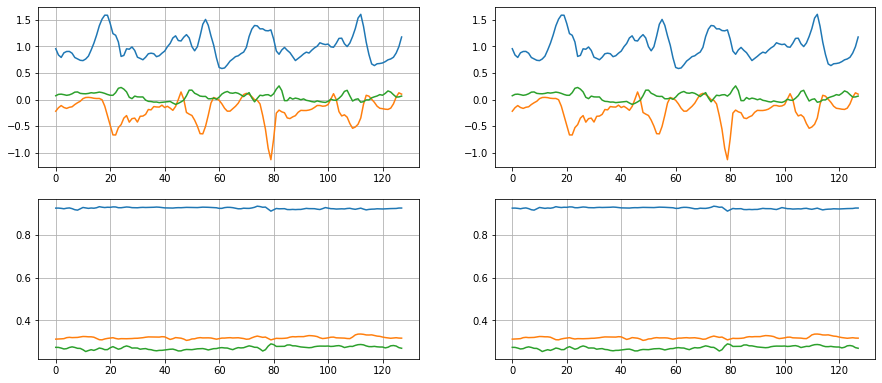

In [47]:
ind = 2800

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,2, 1)
ax.plot(train[ind])
ax.grid(True)
ax = fig.add_subplot(3,2, 2)
ax.plot(total_acc_x_train[ind])
ax.plot(total_acc_y_train[ind])
ax.plot(total_acc_z_train[ind])

ax = fig.add_subplot(3,2, 3)
ax.plot(test[ind])
ax.grid(True)
ax = fig.add_subplot(3,2, 4)
ax.plot(total_acc_x_test[ind])
ax.plot(total_acc_y_test[ind])
ax.plot(total_acc_z_test[ind])



ax.grid(True)

In [ ]:
type_name = {1.0: "WALKING",
            2.0: "WALKING_UPSTAIRS",
            3.0: "WALKING_DOWNSTAIRS",
            4.0: "SITTING",
            5.0: "STANDING",
            6.0: "LAYING"}

type_name[1.0]

In [ ]:
type_list = set(y_data) 
print(type_list)


ii = 1

fig = plt.figure(figsize=(15,10))


for id in range(len(y_train)):
    
#     ax.plot(total_acc_x_train[id])
#     ax.plot(total_acc_y_train[id])
#     ax.plot(total_acc_z_train[id])

    if y_train[id] in type_list:
        ax = fig.add_subplot(2,3, ii)
#         ax.set_ylim(-0.3, 0.3)
        
        ax.set_title(type_name[y_train[id]])
#         ax.plot(total_acc_x_train[id])
#         ax.plot(total_acc_y_train[id])
#         ax.plot(total_acc_z_train[id])
        
        ax.plot(np_svm(total_acc_x_train[id], total_acc_y_train[id], total_acc_z_train[id]))
        
        type_list.remove(y_train[id])
        ii+=1
        
#     ax.plot(total_acc_x_train[id])

    
#     ax.plot(y_train[id])


    ax.grid(True)
#     ax.set_title(f"x_train{id}")


In [ ]:
data_y = np.loadtxt('./UCI_HAR_Dataset/train/y_train.txt')

In [ ]:
data_y

```
1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING
```

In [18]:
tt = np.array([32,32,3])
tt = np.tile(tt, (10,1,1,1))

tt.shape[0][3]

TypeError: 'int' object is not subscriptable

In [1]:
from keras import layers, models
from keras import backend as K
import numpy as np


import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

Using TensorFlow backend.


In [2]:
import math

def cropping(K=4, expand_rate=4):
    def crop(x):
        crop_list = list()
        input_shape = x.shape[-2].value
        _k_pool = [2**x for x in range(K)]
        _k_list = [int(input_shape*(0.5**x)) for x in range(K)]

#         print(input_shape)
#         print(_k_pool)
#         print(_k_list)

        for ind, value in enumerate(_k_pool):
            for ii in range(value):
                y1 = ii * _k_list[ind]
                y2 = ii * _k_list[ind] + _k_list[ind]
    
#                 print(y1,y2)
                
#                 padding1 = math.ceil((input_shape-_k_list[ind])*0.5)
#                 padding2 = math.floor((input_shape-_k_list[ind])*0.5)
                
                padding1 = abs(0-y1)
                padding2 = abs(input_shape-y2)
                
#                 print(padding1,padding2)

                croped = layers.Lambda( lambda x: x[:,y1:y2,:])(x)
                
                croped_pad = layers.ZeroPadding1D(padding =(padding1, padding2))(croped)
                
                y = layers.Conv1D(expand_rate*10, 1, padding='same', use_bias=True)(croped_pad)
                
                crop_list.append(y)
                
#         y = layers.Concatenate(axis=-1)(crop_list)
        return crop_list
    return crop

# basic

In [3]:
def dense_block(x, blocks, growth_rate, name):

    for i in range(blocks):
        x = conv_block(x, growth_rate, name=name + '_block' + str(i + 1))
    return x

def conv_block(x, growth_rate, name):
    bn_axis = 2
    x1 = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_0_bn')(x)

    x1 = layers.Activation('relu', name=name + '_0_relu')(x1)

    x1 = layers.Conv1D(4 * growth_rate, 1, use_bias=True, kernel_initializer='he_normal', name=name + '_1_conv')(x1)

    x1 = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_1_bn')(x1)

    x1 = layers.Activation('relu', name=name + '_1_relu')(x1)

    x1 = layers.Conv1D(growth_rate, 3, padding='same', use_bias=True, kernel_initializer='he_normal', name=name + '_2_conv')(x1)

    x = layers.Concatenate(axis=bn_axis, name=name + '_concat')([x, x1])

    # x = layers.Conv1D(growth_rate, 1, padding='same', use_bias=False, name=name + '_3_conv')(x)
    # x = layers.Add(name=name + '_concat')([x, x1])

    return x



def transition_block(x, reduction, name):
    bn_axis = 2
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_bn')(x)

    x = layers.Activation('relu', name=name + '_relu')(x)

    x = layers.Conv1D(int(K.int_shape(x)[bn_axis] * reduction), 1, use_bias=False, kernel_initializer='he_normal', name=name + '_conv')(x)
                      
#     x = layers.AveragePooling1D(2, strides=2, name=name + '_pool')(x)
    x = layers.MaxPooling1D(2, strides=2, name=name + '_pool')(x)

    # x = spatial_pyramid_pool(x, 3, bn_axis, name)
        
    return x


# test1

In [4]:

inputs = layers.Input(shape=(128,1), name='input')

x = cropping(K=5, expand_rate=10)(inputs)


denses = list()

blocks = [4,4,4,4]
extension_rate = 8
classes = 6

for ind, x in enumerate(x):
    
    x = dense_block(x, blocks[0], extension_rate, name=f'{ind}_conv2')
    x = transition_block(x, 0.5, name=f'{ind}_pool2')
    
    x = dense_block(x, blocks[1], extension_rate, name=f'{ind}_conv3')
    x = transition_block(x, 0.5, name=f'{ind}_pool3')
    
    x = dense_block(x, blocks[2], extension_rate, name=f'{ind}_conv4')
    x = transition_block(x, 0.5, name=f'{ind}_pool4')
    
    x = dense_block(x, blocks[3], extension_rate, name=f'{ind}_conv5')
    x = transition_block(x, 0.5, name=f'{ind}_pool5')
    
    denses.append(x)
    print(x)
    
    
x = layers.Concatenate(axis=-1, name="laters_concate")(denses)

x = layers.GlobalAveragePooling1D(name='avg_pool')(x)
x = layers.Dense(classes, activation='softmax', name='fc')(x)





model = models.Model(inputs, x)


model.summary()

Tensor("0_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("1_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("2_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("3_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("4_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("5_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("6_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("7_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("8_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("9_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("10_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("11_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("12_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("13_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tensor("14_pool5_pool/Squeeze:0", shape=(?, 8, 36), dtype=float32)
Tenso

7_conv2_block2_2_conv (Conv1D)  (None, 128, 8)       776         7_conv2_block2_1_relu[0][0]      
__________________________________________________________________________________________________
8_conv2_block2_2_conv (Conv1D)  (None, 128, 8)       776         8_conv2_block2_1_relu[0][0]      
__________________________________________________________________________________________________
9_conv2_block2_2_conv (Conv1D)  (None, 128, 8)       776         9_conv2_block2_1_relu[0][0]      
__________________________________________________________________________________________________
10_conv2_block2_2_conv (Conv1D) (None, 128, 8)       776         10_conv2_block2_1_relu[0][0]     
__________________________________________________________________________________________________
11_conv2_block2_2_conv (Conv1D) (None, 128, 8)       776         11_conv2_block2_1_relu[0][0]     
__________________________________________________________________________________________________
12_conv2_b

4_pool2_relu (Activation)       (None, 128, 132)     0           4_pool2_bn[0][0]                 
__________________________________________________________________________________________________
5_pool2_relu (Activation)       (None, 128, 132)     0           5_pool2_bn[0][0]                 
__________________________________________________________________________________________________
6_pool2_relu (Activation)       (None, 128, 132)     0           6_pool2_bn[0][0]                 
__________________________________________________________________________________________________
7_pool2_relu (Activation)       (None, 128, 132)     0           7_pool2_bn[0][0]                 
__________________________________________________________________________________________________
8_pool2_relu (Activation)       (None, 128, 132)     0           8_pool2_bn[0][0]                 
__________________________________________________________________________________________________
9_pool2_re

15_conv3_block3_0_bn (BatchNorm (None, 64, 82)       328         15_conv3_block2_concat[0][0]     
__________________________________________________________________________________________________
16_conv3_block3_0_bn (BatchNorm (None, 64, 82)       328         16_conv3_block2_concat[0][0]     
__________________________________________________________________________________________________
17_conv3_block3_0_bn (BatchNorm (None, 64, 82)       328         17_conv3_block2_concat[0][0]     
__________________________________________________________________________________________________
18_conv3_block3_0_bn (BatchNorm (None, 64, 82)       328         18_conv3_block2_concat[0][0]     
__________________________________________________________________________________________________
19_conv3_block3_0_bn (BatchNorm (None, 64, 82)       328         19_conv3_block2_concat[0][0]     
__________________________________________________________________________________________________
20_conv3_b

28_conv4_block1_1_bn (BatchNorm (None, 32, 32)       128         28_conv4_block1_1_conv[0][0]     
__________________________________________________________________________________________________
29_conv4_block1_1_bn (BatchNorm (None, 32, 32)       128         29_conv4_block1_1_conv[0][0]     
__________________________________________________________________________________________________
30_conv4_block1_1_bn (BatchNorm (None, 32, 32)       128         30_conv4_block1_1_conv[0][0]     
__________________________________________________________________________________________________
0_conv4_block1_1_relu (Activati (None, 32, 32)       0           0_conv4_block1_1_bn[0][0]        
__________________________________________________________________________________________________
1_conv4_block1_1_relu (Activati (None, 32, 32)       0           1_conv4_block1_1_bn[0][0]        
__________________________________________________________________________________________________
2_conv4_bl

15_conv4_block4_1_bn (BatchNorm (None, 32, 32)       128         15_conv4_block4_1_conv[0][0]     
__________________________________________________________________________________________________
16_conv4_block4_1_bn (BatchNorm (None, 32, 32)       128         16_conv4_block4_1_conv[0][0]     
__________________________________________________________________________________________________
17_conv4_block4_1_bn (BatchNorm (None, 32, 32)       128         17_conv4_block4_1_conv[0][0]     
__________________________________________________________________________________________________
18_conv4_block4_1_bn (BatchNorm (None, 32, 32)       128         18_conv4_block4_1_conv[0][0]     
__________________________________________________________________________________________________
19_conv4_block4_1_bn (BatchNorm (None, 32, 32)       128         19_conv4_block4_1_conv[0][0]     
__________________________________________________________________________________________________
20_conv4_b

10_conv5_block4_1_bn (BatchNorm (None, 16, 32)       128         10_conv5_block4_1_conv[0][0]     
__________________________________________________________________________________________________
11_conv5_block4_1_bn (BatchNorm (None, 16, 32)       128         11_conv5_block4_1_conv[0][0]     
__________________________________________________________________________________________________
12_conv5_block4_1_bn (BatchNorm (None, 16, 32)       128         12_conv5_block4_1_conv[0][0]     
__________________________________________________________________________________________________
13_conv5_block4_1_bn (BatchNorm (None, 16, 32)       128         13_conv5_block4_1_conv[0][0]     
__________________________________________________________________________________________________
14_conv5_block4_1_bn (BatchNorm (None, 16, 32)       128         14_conv5_block4_1_conv[0][0]     
__________________________________________________________________________________________________
15_conv5_b

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
from IPython.display import clear_output
import time

data = np.arange(0,128,1)
data = np.expand_dims(data, -1)
data = np.tile(data, (1,1,1))

# print(data.shape)
# print(data)

# layer_output       = model.layers[-1].output
layer_output       = model.get_layer("laters_concate").output

intermediate_model = models.Model(inputs=model.input, outputs=layer_output)
intermediate_prediction=intermediate_model.predict(data)

id = 1
for id in range(intermediate_prediction.shape[-1]):
    
    time.sleep(0.1)
    clear_output(wait = True)
    print(intermediate_prediction[...,id].shape)
    print(intermediate_prediction[...,id])



(1, 8)
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  -2.6184199e-07 -1.2627249e-03  4.9909949e-01 -9.8383656e+00]]


# test2

In [ ]:
nChannels = 2


img_input = layers.Input(shape=(128,1))

x0 = layers.Conv1D(nChannels*10, 1,  strides=1, use_bias=True, padding='same', name='conv1_1')(img_input)
x1 = layers.Conv1D(nChannels*10, 3,  strides=1, use_bias=True, padding='same', name='conv1_2')(img_input)
x2 = layers.Conv1D(nChannels*10, 5,  strides=1, use_bias=True, padding='same', name='conv1_3')(img_input)
x3 = layers.Conv1D(nChannels*10, 7,  strides=1, use_bias=True, padding='same', name='conv1_4')(img_input)
x4 = layers.Conv1D(nChannels*10, 9, strides=1, use_bias=True, padding='same', name='conv1_5')(img_input)


x = layers.Concatenate(axis=-1, name='img_concat')([x0,x1,x2,x3,x4])

model = models.Model(img_input, x)

model.summary()

In [ ]:
from IPython.display import clear_output
import time

data = np.arange(0,128,1)
data = np.expand_dims(data, -1)
data = np.tile(data, (1,1,1))

# print(data.shape)
# print(data)

# layer_output       = model.layers[-1].output
layer_output       = model.get_layer("img_concat").output

intermediate_model = models.Model(inputs=model.input, outputs=layer_output)
intermediate_prediction=intermediate_model.predict(data)

id = 1
for id in range(intermediate_prediction.shape[-1]):
    
    time.sleep(0.5)
    clear_output(wait = True)
    print(intermediate_prediction[...,id].shape)
    print(intermediate_prediction[...,id])



In [88]:

inputs = layers.Input(shape=(128,1))

splited_input = split_Input(K=4)(inputs)


x = layers.Concatenate(split_layer)

print(x)
x = layers.Conv1D(10, 3)(x)


# x = layers.Dense(10)(x)

# model = models.Model(inputs, x)


NameError: name 'split_Input' is not defined

# model test

In [26]:

import math

def cropping(K=4, expand_rate=4):
    def crop(x):
        crop_list = list()
        input_shape = x.shape[-2].value
        _k_pool = [2**x for x in range(K)]
        _k_list = [int(input_shape*(0.5**x)) for x in range(K)]

#         print(input_shape)
#         print(_k_pool)
#         print(_k_list)

        for ind, value in enumerate(_k_pool):
            for ii in range(value):
                y1 = ii * _k_list[ind]
                y2 = ii * _k_list[ind] + _k_list[ind]
    
#                 print(y1,y2)
                
#                 padding1 = math.ceil((input_shape-_k_list[ind])*0.5)
#                 padding2 = math.floor((input_shape-_k_list[ind])*0.5)
                
                padding1 = abs(0-y1)
                padding2 = abs(input_shape-y2)
                
#                 print(padding1,padding2)

                croped = layers.Lambda( lambda x: x[:,y1:y2,:])(x)
                
                croped_pad = layers.ZeroPadding1D(padding =(padding1, padding2))(croped)
                
#                 y = layers.Conv1D(expand_rate*1, 1, padding='same', use_bias=False)(croped_pad)
 
                crop_list.append(croped_pad)
                
        y = layers.Concatenate(axis=-1)(crop_list)
        return y
    return crop


def gg(dat):
    fig = plt.figure(figsize=(15,10))

    ax = fig.add_subplot(3,3, 1)
    ax.plot(dat)

    ax.grid(True)


# model

In [71]:
inputs = layers.Input(shape=(128,3))

x = cropping(5, 1)(inputs)


# x = layers.Conv1D(10,1, padding='same')(inputs)

# x = layers.MaxPool1D(2)(split_layer)

# x = layers.Dense(10)(split_layer)


model = models.Model(inputs, x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 128, 3)       0                                            
__________________________________________________________________________________________________
lambda_120 (Lambda)             (None, 128, 3)       0           input_9[0][0]                    
__________________________________________________________________________________________________
lambda_121 (Lambda)             (None, 64, 3)        0           input_9[0][0]                    
__________________________________________________________________________________________________
lambda_122 (Lambda)             (None, 64, 3)        0           input_9[0][0]                    
__________________________________________________________________________________________________
lambda_123

# load data

In [8]:

data_set_path = './svm'
x_data_svm = np.load(data_set_path+"/x_data_6_128_UCI_HAR_svm_acc.npy")
y_data_svm = np.load(data_set_path+"/y_data_6_128_UCI_HAR_svm_acc.npy")

data_set_path = './nonsvm'
x_data_nonsvm = np.load(data_set_path+"/x_data_6_128_UCI_HAR_nonsvm_acc.npy")
y_data_nonsvm = np.load(data_set_path+"/y_data_6_128_UCI_HAR_nonsvm_acc.npy")


print(x_data_svm.shape)
print(x_data_nonsvm.shape)



(10299, 128)
(10299, 128, 3)


3.0
3.0
3.0


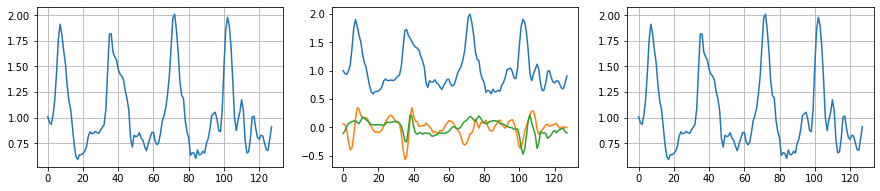

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

np_svm = lambda x, y, z: np.sqrt(np.power(x,2) + np.power(y,2) + np.power(z,2))

ind = 800


fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3, 1)
ax.plot(x_data_svm[ind])
print(y_data_svm[ind])

ax.grid(True)

ax = fig.add_subplot(3,3, 2)
ax.plot(x_data_nonsvm[ind])
print(y_data_nonsvm[ind])

ax = fig.add_subplot(3,3, 3)
ax.plot(np_svm(x_data_nonsvm[ind][:,0], 
              x_data_nonsvm[ind][:,1],
              x_data_nonsvm[ind][:,2]))
print(y_data_nonsvm[ind])



ax.grid(True)

# data = np.arange(0,128,1)
# data = np.expand_dims(data, -1)
# data = np.tile(data, (1,1,1))

# print(data.shape)
# print(data)



# intermediate_output = model.predict(data)


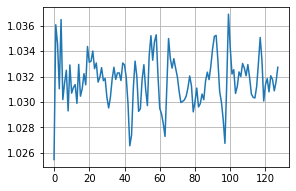

In [61]:






x_data_svm[0].reshape(-1, 128,1)
gg(x_data_svm[0])

(1, 128, 93)


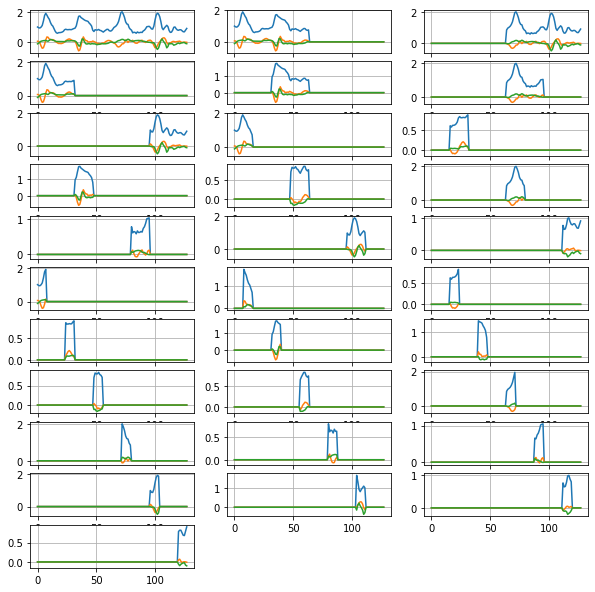

In [84]:
# layer_output=model.get_layer("global_max_pooling1d_1").output

layer_output       = model.layers[-1].output
intermediate_model = models.Model(inputs=model.input, outputs=layer_output)

intermediate_prediction=intermediate_model.predict(x_data_nonsvm[800].reshape(-1, 128,3))


print(intermediate_prediction.shape)


ii = len(intermediate_prediction[0][1]) //6 +1

fig = plt.figure(figsize=(10,15))

for ind in range(intermediate_prediction.shape[-1]//3):
    ax = fig.add_subplot(ii, 3, ind+1)

    ax.plot(intermediate_prediction[0][:,(ind*3):(ind*3+3)])
    ax.grid(True)


# for ind in range(intermediate_prediction.shape[-1]):

#     gg(intermediate_prediction[0][:,ind])




In [85]:
fig.savefig('fig1.png', dpi=300)

In [51]:
print((intermediate_prediction[0][1].shape))

(15,)


31

In [ ]:
from keras.engine.topology import Layer
import keras.backend as K


class SpatialPyramidPooling(Layer):
    """Spatial pyramid pooling layer for 2D inputs.
    See Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition,
    K. He, X. Zhang, S. Ren, J. Sun
    # Arguments
        pool_list: list of int
            List of pooling regions to use. The length of the list is the number of pooling regions,
            each int in the list is the number of regions in that pool. For example [1,2,4] would be 3
            regions with 1, 2x2 and 4x4 max pools, so 21 outputs per feature map
    # Input shape
        4D tensor with shape:
        `(samples, channels, rows, cols)` if dim_ordering='th'
        or 4D tensor with shape:
        `(samples, rows, cols, channels)` if dim_ordering='tf'.
    # Output shape
        2D tensor with shape:
        `(samples, channels * sum([i * i for i in pool_list])`
    """

    def __init__(self, pool_list, **kwargs):

        self.pool_list = pool_list

        self.num_outputs_per_channel = sum([i for i in pool_list])

        super(SpatialPyramidPooling, self).__init__(**kwargs)

    def build(self, input_shape):
        self.nb_channels = input_shape[2]

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.nb_channels * self.num_outputs_per_channel)

    def get_config(self):
        config = {'pool_list': self.pool_list}
        base_config = super(SpatialPyramidPooling, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def call(self, x, mask=None):

        input_shape = K.shape(x)

        num_rows = input_shape[1]
        # num_cols = input_shape[2]

        row_length = [K.cast(num_rows, 'float32') / i for i in self.pool_list]
        # col_length = [K.cast(num_cols, 'float32') / i for i in self.pool_list]


        outputs = []


        for pool_num, num_pool_regions in enumerate(self.pool_list):
            for jy in range(num_pool_regions):
                # for ix in range(num_pool_regions):
                #     x1 = ix * col_length[pool_num]
                #     x2 = ix * col_length[pool_num] + col_length[pool_num]
                    y1 = jy * row_length[pool_num]
                    y2 = jy * row_length[pool_num] + row_length[pool_num]

                    # x1 = K.cast(K.round(x1), 'int32')
                    # x2 = K.cast(K.round(x2), 'int32')
                    y1 = K.cast(K.round(y1), 'int32')
                    y2 = K.cast(K.round(y2), 'int32')

                    # new_shape = [input_shape[0], y2 - y1,
                    #                 x2 - x1, input_shape[3]]

                    new_shape = [input_shape[0], y2 - y1, input_shape[2]]


                    x_crop = x[:, y1:y2, :]
                    xm = K.reshape(x_crop, new_shape)
#                     pooled_val = K.max(xm, axis=1)
                    pooled_val = K.mean(xm, axis=1)
                    outputs.append(pooled_val)

        #outputs = K.concatenate(outputs,axis = 1)
        outputs = K.concatenate(outputs)
        #outputs = K.reshape(outputs,(len(self.pool_list),self.num_outputs_per_channel,input_shape[0],input_shape[1]))
        #outputs = K.permute_dimensions(outputs,(3,1,0,2))
        #outputs = K.reshape(outputs,(input_shape[0], self.num_outputs_per_channel * self.nb_channels))

        return outputs

In [204]:
pool_list=[1,2,4,8,16]
num_rows=16

In [205]:
sum([i for i in pool_list])

31

In [206]:
[num_rows / i for i in pool_list]

[16.0, 8.0, 4.0, 2.0, 1.0]